In [1]:
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../Datasets/netflix_titles.csv")

data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
data["release_year"].value_counts()

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: count, Length: 74, dtype: int64

What are the number of netflix titles released per year?

In [8]:
titles_per_year = data.groupby("release_year")["title"].count().reset_index()

titles_per_year

,release_year,title
0,1925,1
1,1942,2
2,1943,3
3,1944,3
4,1945,4
...,...,...
69,2017,1032
70,2018,1147
71,2019,1030
72,2020,953


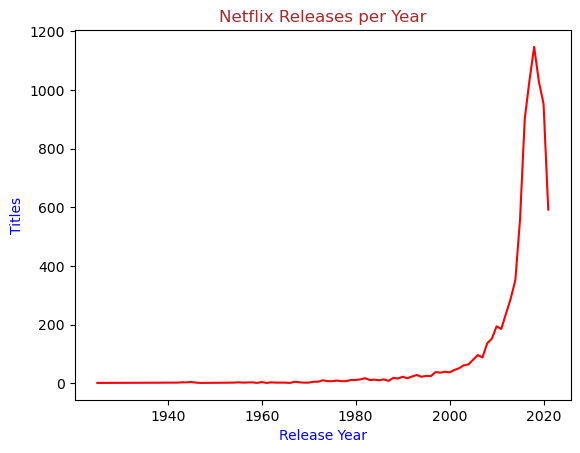

In [11]:
plt.plot(titles_per_year["release_year"], titles_per_year["title"], color='red')
plt.title("Netflix Releases per Year", color='brown')
plt.xlabel("Release Year", color='blue')
plt.ylabel("Titles", color='blue')

plt.show()

In [14]:
type_count = data["type"].value_counts()

In [15]:
type_count

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [16]:
type_count.index

Index(['Movie', 'TV Show'], dtype='object', name='type')

In [17]:
type_count.values

array([6131, 2676], dtype=int64)

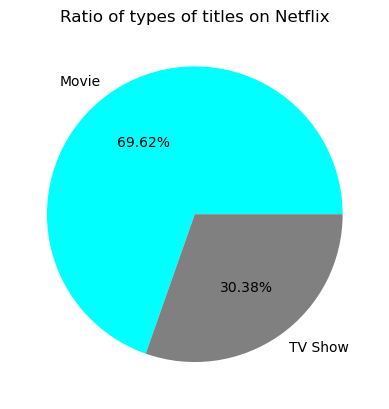

In [20]:
plt.pie(type_count, labels=type_count.index, autopct='%1.2f%%', colors=['cyan','grey'])
plt.title("Ratio of types of titles on Netflix")

plt.show()

In [21]:
data["rating"].value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

In [22]:
data["rating"] = data["rating"].replace({"74 min":"Unknown", "84 min": "Unknown", "66 min": "Unknown"})

In [24]:
rating_count = data["rating"].value_counts()

In [25]:
rating_count.index

Index(['TV-MA', 'TV-14', 'TV-PG', 'R', 'PG-13', 'TV-Y7', 'TV-Y', 'PG', 'TV-G',
       'NR', 'G', 'TV-Y7-FV', 'NC-17', 'Unknown', 'UR'],
      dtype='object', name='rating')

In [26]:
rating_count.values

array([3207, 2160,  863,  799,  490,  334,  307,  287,  220,   80,   41,
          6,    3,    3,    3], dtype=int64)

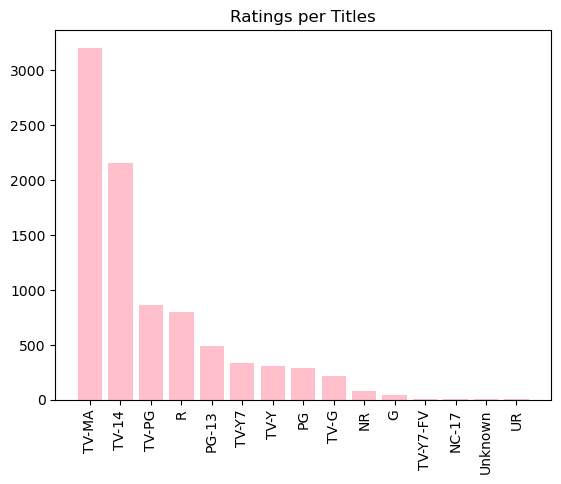

In [30]:
plt.bar(rating_count.index, rating_count.values, color='pink')
plt.xticks(rotation=90)
plt.title("Ratings per Titles")

plt.show()

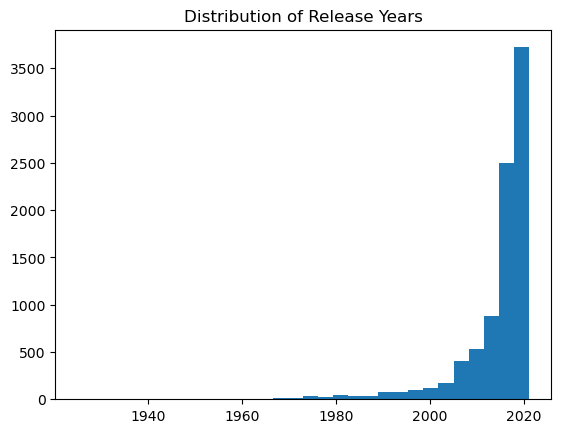

In [33]:
plt.hist(data["release_year"], bins=30)
plt.title("Distribution of Release Years")

plt.show()